   #     Gold price Predictions and Trading Algorithm for Exchange of Gold
                                                                                       Submitted by - Kavinraja G

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
dataset = pd.read_csv('./datasetmonthly.csv')
#Creating the months columns (Sequential manner 1,2,3...)
status2days = [0,0]
#avg2days = [0,0,0,0,0]
avg5months = [dataset.iloc[0,0],dataset.iloc[1,0],dataset.iloc[2,0],dataset.iloc[3,0],dataset.iloc[4,0]]
for index in range(2,dataset.shape[0],1):
    if index>4:
        avg5months.append((dataset.iloc[index-1,0] + dataset.iloc[index-2,0]+ dataset.iloc[index-3,0]+ dataset.iloc[index-4,0]+ dataset.iloc[index-5,0])/5)
    if dataset.iloc[index-1,0] < dataset.iloc[index-2,0]:
        status2days.append(1)
    else:
        status2days.append(0)
dataset['StatusP2Months'] = status2days
dataset['AvgP5Months'] = avg5months
dataset.head(10)

,GoldPrice,OilPrice,Inflation,ExchangeUS,StatusP2Months,AvgP5Months
0,345.561,22.93,0.27,1.4286,0,345.5610
1,339.053,15.46,-0.27,1.4300,0,339.0530
2,346.095,12.61,-0.46,1.4126,1,346.0950
3,340.716,12.84,-0.18,1.3835,0,340.7160
4,342.325,15.38,0.28,1.3751,1,342.3250
5,342.798,13.43,0.55,1.4516,0,342.7500
6,348.554,11.59,0.00,1.5896,0,342.1974
7,376.290,15.10,0.18,1.6332,0,344.0976
8,418.152,14.87,0.46,1.6075,0,350.1366
9,423.863,14.90,0.09,1.5667,0,365.6238


In [107]:
y = dataset['GoldPrice']
x = dataset.loc[:, dataset.columns != 'GoldPrice']

In [108]:
dependentValues_train, dependentValues_test, goldPrice_train, goldPrice_test = train_test_split(x, y, test_size = 0.3, shuffle = False)

In [109]:
Price_model = LinearRegression().fit(dependentValues_train, goldPrice_train)

In [110]:
pricePrediction = Price_model.predict(dependentValues_test)

In [111]:
#Analysis
print('Coefficients: \n', Price_model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(goldPrice_test, pricePrediction))
print('Coefficient of determination: %.2f'
      % r2_score(goldPrice_test, pricePrediction))

Coefficients: 
 [ -0.02550493   0.85541592  19.41932401 -16.64246085   1.02782978]
Mean squared error: 6535.23
Coefficient of determination: 0.96


In [122]:
openingBalance = 50000
balance = openingBalance
profitLoss = [0]
#Status for buy and sell
buyPrice = np.empty(dependentValues_test.shape[0],)
sellPrice = np.empty(dependentValues_test.shape[0],)
currBalance = [openingBalance]
#Initial CP for Gold
costPrice = 500
for index in range(1,dependentValues_test.shape[0]-1,1):
    #past = Price_model.predict( dependentValues_test.iloc[index-1].to_numpy().reshape(1,-1) )
    present = Price_model.predict( dependentValues_test.iloc[index].to_numpy().reshape(1,-1) )
    future = Price_model.predict( dependentValues_test.iloc[index+1].to_numpy().reshape(1,-1) )   
    #Here we predict the price for next month and compare with present month and decide to sell or buy
    if present >= future:
        sellPrice[index] = present[0]
        buyPrice[index] = np.nan
        balance = balance + present[0]
        profit = ((present[0] - costPrice)/costPrice)*100 
        profitLoss.append(profit)
        currBalance.append(balance)
    else:
        buyPrice[index] = present[0]
        sellPrice[index] = np.nan
        balance = balance - present[0]
        loss = ((present[0] - costPrice)/costPrice)*100 
        profitLoss.append(loss)
        costPrice = present[0]
        currBalance.append(balance)
profitLoss.append(0)
currBalance.append(balance)
print('Final Balance: $',balance)

Final Balance: $ 16977.121953337384


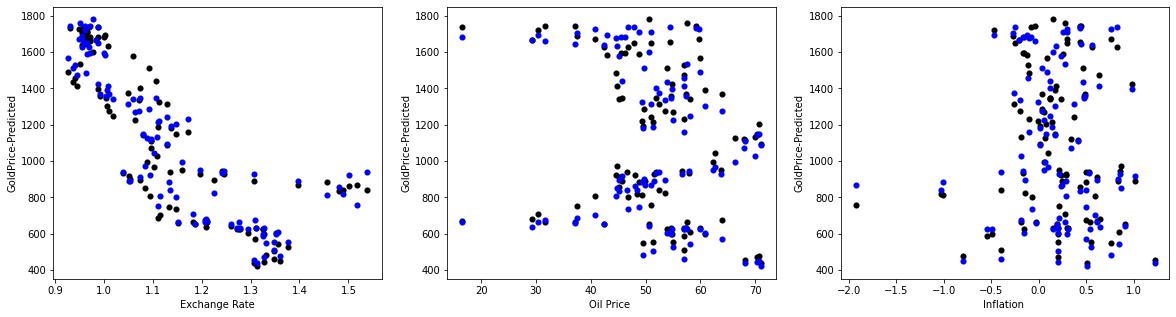

In [118]:
#Analysis of Model Prediction
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.ylabel("GoldPrice-Predicted")
plt.xlabel("Exchange Rate")
plt.scatter(dependentValues_test.ExchangeUS, pricePrediction,  color='black', linewidth=0.1)
plt.scatter(dependentValues_test.ExchangeUS, goldPrice_test, color='blue', linewidth=0.1)
plt.subplot(1,3,2)
plt.scatter(dependentValues_test.OilPrice, goldPrice_test, color='black', linewidth=0.1)
plt.scatter(dependentValues_test.OilPrice, pricePrediction, color='blue', linewidth=0.1)
plt.ylabel("GoldPrice-Predicted")
plt.xlabel("Oil Price ")
plt.subplot(1,3,3)
plt.scatter(dependentValues_test.Inflation, goldPrice_test, color='black', linewidth=0.1)
plt.scatter(dependentValues_test.Inflation, pricePrediction, color='blue', linewidth=0.1)
plt.ylabel("GoldPrice-Predicted")
plt.xlabel("Inflation ")
plt.show()


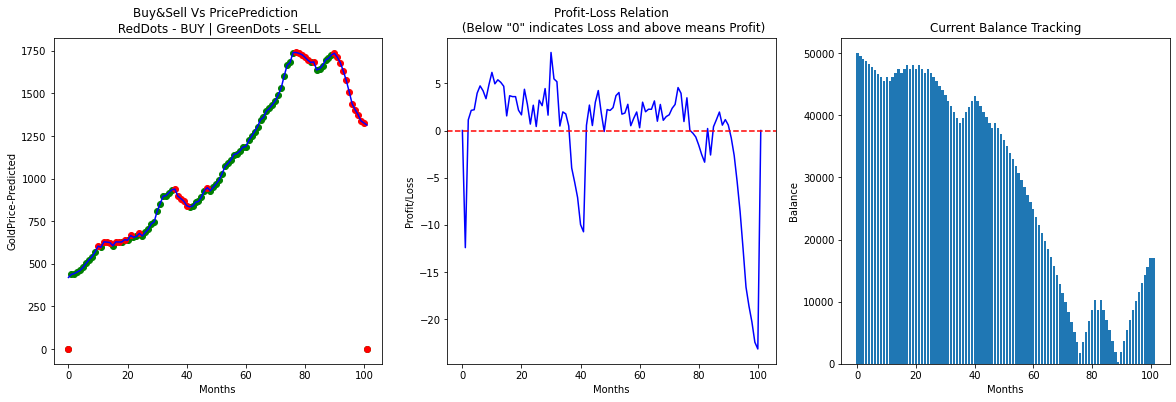

In [119]:
#Plot for Buy and Sell points
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Buy&Sell Vs PricePrediction \n RedDots - BUY | GreenDots - SELL')
plt.plot(np.arange(102),pricePrediction, 'b')
plt.scatter(np.arange(102),buyPrice, color='g')
plt.scatter(np.arange(102),sellPrice, color='r')
plt.ylabel("GoldPrice-Predicted")
plt.xlabel("Months")
#Plot for Profit-Loss Relation
plt.subplot(1,3,2)
plt.title('Profit-Loss Relation\n (Below "0" indicates Loss and above means Profit)')
plt.plot(np.arange(102),profitLoss, 'b')
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Profit/Loss")
plt.xlabel("Months")
#Plot for Current Balance Tracking
plt.subplot(1,3,3)
plt.title('Current Balance Tracking')
plt.bar(np.arange(102),currBalance,)
plt.ylabel("Balance")
plt.xlabel("Months")
plt.show()